In [1]:
import sys

sys.path.append("..")
import torch as th
import itertools
import atomium
import pandas as pd

from feature.base import GraphData

/home/users/kkaminski/anaconda3/envs/ds/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


attempted relative import beyond top-level package


In [2]:

dataset = "/home/nfs/rmadaj/DeepSocket_prepare/data/feb24/feb24_full.pkl"
dataset = pd.read_pickle(dataset)
#dataset = dataset[dataset.is_valid == True]

In [3]:
r = th.rand((300, 3))
norm = th.linalg.vector_norm(r, ord=2, dim=1)

In [4]:
resdata = list()
conndata = list()
for idx, row in dataset.iterrows():
    try:
        gr = GraphData.from_pdb(row.path)
    except Exception as e:
        print(e)
        continue
    resdata.append(gr.to_nodedf())
    conndata.append(gr.to_df())
    print(idx)
    if idx > 88:
        break

number of residues is different then CA atoms 162 and 163


ValueError: Must pass 2-d input. shape=(154, 4, 3)

In [16]:
import torch as th
from torch import linalg as LA

ca = th.rand((156, 3))
c = th.rand((156, 3))
n = th.rand((156, 3))


b1 = ca - c
b2 = c.roll(1) - n.roll(1)
b3 = n.roll(1) - ca.roll(1)
n1 = th.cross(b1, b2)
n1 /= LA.vector_norm(n1, ord=2, dim=1, keepdim=True)
n2 = th.cross(b2, b3)
n2 /= LA.vector_norm(n2, ord=2, dim=1, keepdim=True)
# normalize b2 
#b2 /= LA.vector_norm(b2, ord=2, dim=1, keepdim=True)
#m1 = th.cross(n1, b2)
#x = (n1 * n2).sum(1)
#y = (m1 * n2).sum(1)
b_cross23 = th.cross(b2, b3)
b_cross12 = th.cross(b1, b2)
b2_norm = LA.vector_norm(b2, ord=2, dim=1, keepdim=True)
b_cross1223 = (b_cross12, b_cross23).sum(1, keepdim=True)
b21 = b2_norm*th.tensordot(b1, b_cross23, dims=0)
dihedral = th.atan2(b21, b_cross1223)
phi = dihedral
psi = dihedral.roll(1)
# fill borders
phi[0] = 0
psi[0] = 0

In [17]:
psi.shape, psi.shape, b21.shape, b_cross1223.shape, th.atan2(b21, b_cross1223).shape

(torch.Size([156, 3, 156, 3]),
 torch.Size([156, 3, 156, 3]),
 torch.Size([156, 3, 156, 3]),
 torch.Size([156, 3, 156, 3]),
 torch.Size([156, 3, 156, 3]))

In [ ]:
b2_norm.shape, th.dot(b1, b_cross23).shape, b1.shape

RuntimeError: 1D tensors expected, but got 2D and 2D tensors

In [ ]:
b_cross23.shape

torch.Size([156, 3])

In [ ]:
resdf = pd.concat(resdata, ignore_index=True)

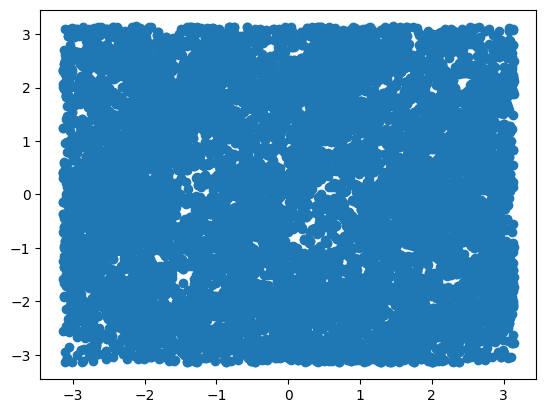

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(resdf.phi, resdf.psi)

In [ ]:
resdf

,phi,psi,chi1,chi2,residue
0,0.000000,0.000000,0.000000,0.000000,MET
1,2.993855,-1.543115,NaN,NaN,VAL
2,0.329229,2.993855,NaN,NaN,LEU
3,-2.820583,0.329229,NaN,NaN,SER
4,1.696506,-2.820583,NaN,NaN,GLU
...,...,...,...,...,...
18262,-1.151830,1.491983,0.357584,2.183325,GLN
18263,-2.267871,-1.151830,-0.563003,0.357584,TYR
18264,2.595466,-2.267871,1.444414,-0.563003,LEU
18265,1.570211,2.595466,1.747484,1.444414,PHE
